In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
load_df = pd.read_csv('./analysis.txt')
load_df.rename(columns={'Timestamp': 'load_timestamp'}, inplace=True)
server_df = pd.read_csv('./server_stats/stats.log')
server_df.rename(columns={'Timestamp': 'server_timestamp'}, inplace=True)
print(load_df.columns)
print(server_df.columns)

Index(['load_timestamp', 'Load(M)', 'Average_Resp_Time', 'Throughput',
       'Successful_response', 'Error_Rate', 'Request_Sent_Rate', 'Average_CPU',
       'Average_Threads'],
      dtype='object')
Index(['server_timestamp', 'DateTime', 'CPU_Utilization', 'NLWP'], dtype='object')


In [33]:
load_df_cpu = load_df[['load_timestamp', 'Average_CPU']]
load_df_cpu['load_timestamp_end'] = load_df_cpu['load_timestamp'].shift(fill_value=0)
print(load_df_cpu.head(5))
# server_df_cpu = server_df[['server_timestamp', 'CPU_Utilization']]

NameError: name 'fill_value' is not defined

In [25]:
server_df_cpu

,server_timestamp,CPU_Utilization
0,1697897049,1
1,1697897051,2
2,1697897053,1
3,1697897055,1
4,1697897057,2
...,...,...
829,1697898746,0
830,1697898748,3
831,1697898750,2
832,1697898752,0


In [27]:
df = pd.merge_asof(server_df_cpu, load_df_cpu, left_on='server_timestamp', right_on='load_timestamp')

df

,server_timestamp,CPU_Utilization,load_timestamp,Average_CPU
0,1697897049,1,NaN,NaN
1,1697897051,2,NaN,NaN
2,1697897053,1,NaN,NaN
3,1697897055,1,NaN,NaN
4,1697897057,2,1.697897e+09,2.00000
...,...,...,...,...
829,1697898746,0,1.697897e+09,8.05263
830,1697898748,3,1.697897e+09,8.05263
831,1697898750,2,1.697897e+09,8.05263
832,1697898752,0,1.697897e+09,8.05263


In [6]:
df

,Timestamp,Load(M),Average_Resp_Time,Throughput,Successful_response,Error_Rate,Request_Sent_Rate,Average_CPU,Average_Threads,DateTime,CPU_Utilization,NLWP
0,1697897056,2,0.000341,108.223089,108.223089,0,54.111544,2.00000,21,2023-10-21 19:34:15,1,21
1,1697897062,4,0.000305,228.682914,228.682914,0,114.341457,1.50000,21,2023-10-21 19:34:21,5,21
2,1697897068,6,0.000325,665.640768,665.640768,0,332.820384,2.00000,21,2023-10-21 19:34:27,10,21
3,1697897075,8,0.000462,747.096705,747.096705,0,373.548352,2.75000,21,2023-10-21 19:34:34,8,21
4,1697897081,10,0.000423,971.880909,971.880909,0,485.940454,2.80000,21,2023-10-21 19:34:40,7,21
5,1697897088,12,0.000538,1034.365915,1034.365915,0,517.182958,3.00000,21,2023-10-21 19:34:48,4,21
6,1697897095,14,0.000632,1113.549737,1113.549737,0,556.774869,3.14286,21,2023-10-21 19:34:54,11,21
7,1697897102,16,0.000889,1073.678953,1073.678953,0,536.839477,3.37500,21,2023-10-21 19:35:02,7,21
8,1697897109,18,0.001232,1027.365624,1027.365624,0,513.682812,3.88889,21,2023-10-21 19:35:08,8,21
9,1697897117,20,0.001794,944.435602,944.435602,0,472.217801,4.40000,21,2023-10-21 19:35:17,16,21


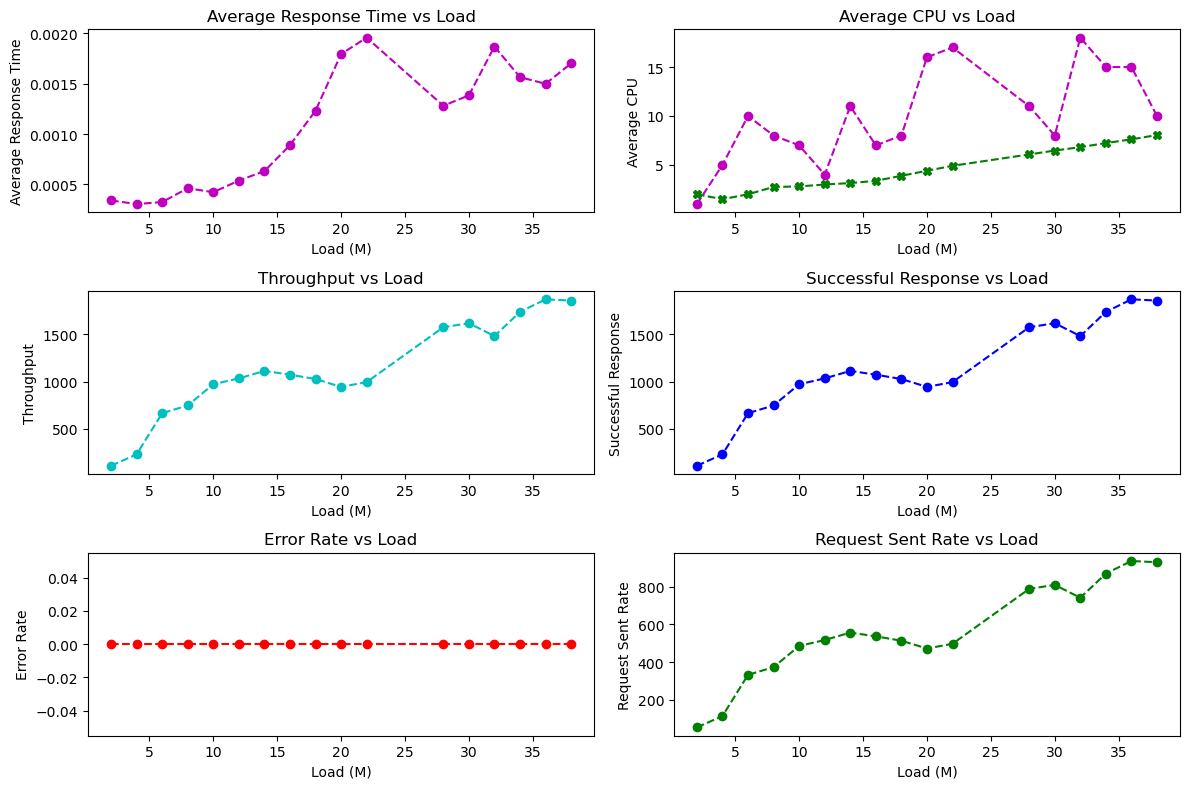

In [5]:
# Extract the columns from the DataFrame
load = df['Load(M)']
average_resp_time = df['Average_Resp_Time']
throughput = df['Throughput']
successful_response = df['Successful_response']
error_rate = df['Error_Rate']
request_sent_rate = df['Request_Sent_Rate']
cpu_util = df['CPU_Utilization']
cpu_util_client = df['Average_CPU']

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Plot Average Response Time vs Load
axs[0, 0].plot(load, average_resp_time, marker='o', linestyle='--', color='m')
axs[0, 0].set_title('Average Response Time vs Load')
axs[0, 0].set_xlabel('Load (M)')
axs[0, 0].set_ylabel('Average Response Time')

# Plot Average CPU vs Load
axs[0, 1].plot(load, cpu_util, marker='o', linestyle='--', color='m')
axs[0, 1].plot(load, cpu_util_client, marker='X', linestyle='--', color='g')
axs[0, 1].set_title('Average CPU vs Load')
axs[0, 1].set_xlabel('Load (M)')
axs[0, 1].set_ylabel('Average CPU')

# Plot Throughput vs Load
axs[1, 0].plot(load, throughput, marker='o', linestyle='--', color='c')
axs[1, 0].set_title('Throughput vs Load')
axs[1, 0].set_xlabel('Load (M)')
axs[1, 0].set_ylabel('Throughput')

# Plot Successful Response vs Load
axs[1, 1].plot(load, successful_response, marker='o', linestyle='--', color='b')
axs[1, 1].set_title('Successful Response vs Load')
axs[1, 1].set_xlabel('Load (M)')
axs[1, 1].set_ylabel('Successful Response')

# Plot Error Rate vs Load
axs[2, 0].plot(load, error_rate, marker='o', linestyle='--', color='r')
axs[2, 0].set_title('Error Rate vs Load')
axs[2, 0].set_xlabel('Load (M)')
axs[2, 0].set_ylabel('Error Rate')

# Plot Request Sent Rate vs Load
axs[2, 1].plot(load, request_sent_rate, marker='o', linestyle='--', color='g')
axs[2, 1].set_title('Request Sent Rate vs Load')
axs[2, 1].set_xlabel('Load (M)')
axs[2, 1].set_ylabel('Request Sent Rate')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('server_metrics2.png')
plt.show()
